# Phased Array Parameter Sensitivity Simulation



In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [59]:
def plot_touchstone(parameter, i, j, f_min, f_max):
    for k in range(1, 4):
        filename = "touchstone/parameter-" + parameter + "_" + str(k) + ".s4p"
        a = rf.Network(filename)
        f_min_indices = np.where(a.frequency.f_scaled >= f_min)[0]
        f_max_indices = np.where(a.frequency.f_scaled <= f_max)[0]
        min_index = f_min_indices[0]
        max_index = f_max_indices[-1]
        plt.plot(a.frequency.f_scaled[min_index:max_index+1], a.s_db[min_index:max_index+1, i, j], label=parameter + "_" + str(k))


def bandwidth(filename, i, j):
    a = rf.Network(filename)
    bw_f = [f for f, s11 in zip(a.frequency.f_scaled, a.s_db[:, 0, 0]) if s11 < -10 and 20 <= f <= 30]
    print('Bandwidth:', bw_f[-1] - bw_f[0])
    

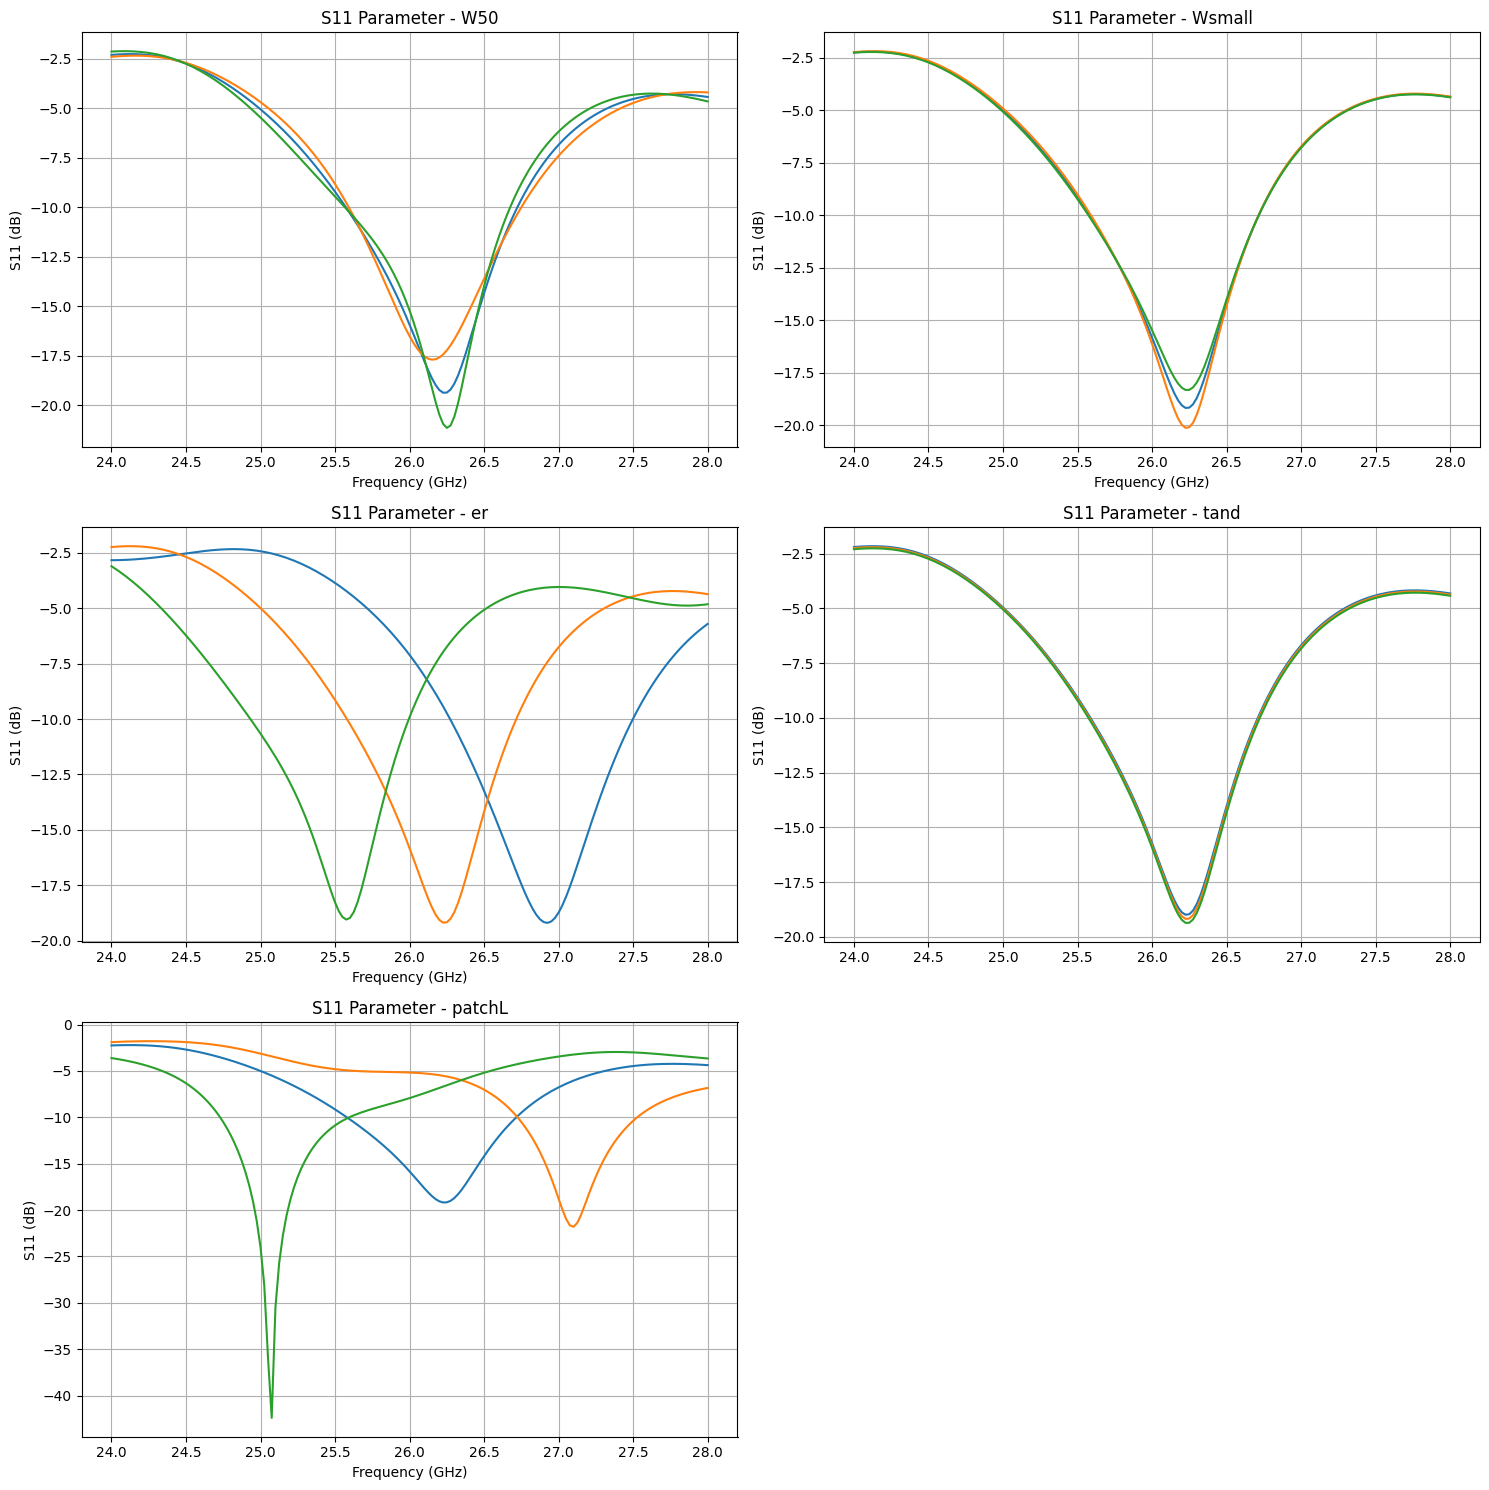

In [60]:
plt.figure(figsize=(15, 15))  # Increase the figure size to accommodate all plots

# Plot S11 parameter for W50
plt.subplot(3, 2, 1)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('W50', 1, 1, 24, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - W50')
plt.grid(True)

# Plot S11 parameter for Wsmall
plt.subplot(3, 2, 2)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('Wsmall', 1, 1, 24, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - Wsmall')
plt.grid(True)

# Plot S11 parameter for er
plt.subplot(3, 2, 3)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('er', 1, 1, 24, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - er')
plt.grid(True)

# Plot S11 parameter for tand
plt.subplot(3, 2, 4)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('tand', 1, 1, 24, 28)
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - tand')
plt.grid(True)

# Plot S11 parameter for patchL
plt.subplot(3, 2, 5)  # Adjust the subplot layout to accommodate all plots
plot_touchstone('patchL', 1, 1, 24, 28)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11 (dB)')
plt.title('S11 Parameter - patchL')
plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
import numpy as np

### Uncertainty Measurements - 5 For each uncertainty
### for S-Parameters of the phased array antenna
# 1. Cable Positioning/Bending
s11_cable = [-21.3, -21.08, -21.22, -20.18, -20.42]

# 2. Connector Mating
s11_connector = [-20.97, -21.29, -22.22, -22.45, -22.48]

# 3. Material around the antenna
s11_material = [-22.66, -22.08, -23.05, -23.18, -23.2]

# 4. Measurement Time
s11_time = [-28.97, -28.9, -28.96, -28.28, -29.05]

# 5. Operator Uncertainty
s11_operator = [-24.48, -25.19, -25.98, -27.19, -27.76]

# Calculate the standard deviations
std_cable = np.std(s11_cable)
std_connector = np.std(s11_connector)
std_material = np.std(s11_material)
std_time = np.std(s11_time)
std_operator = np.std(s11_operator)

# Print the standard deviations
print("Standard Deviation - Cable Positioning/Bending:", std_cable)
print("Standard Deviation - Connector Mating:", std_connector)
print("Standard Deviation - Material around the antenna:", std_material)
print("Standard Deviation - Measurement Time:", std_time)
print("Standard Deviation - Operator Uncertainty:", std_operator)

Uc = np.sqrt(std_cable**2 + std_connector**2 + std_material**2 + std_time**2 + std_operator**2)
print(f"Combined Uncertainty: {Uc} dB")

# For n=5, k = 95.45%, t = 2.65
Uc_corrected = Uc * 2.65
print(f"Expanded Uncertainty (Account for limited measurement samples): {Uc_corrected} dB")


Standard Deviation - Cable Positioning/Bending: 0.45290175535098076
Standard Deviation - Connector Mating: 0.628757504925389
Standard Deviation - Material around the antenna: 0.424056599995803
Standard Deviation - Measurement Time: 0.28009998214923143
Standard Deviation - Operator Uncertainty: 1.2172592164366638
Combined Uncertainty: 1.5298548950799227 dB
Combined Uncertainty (Account for limited measurement samples): 4.054115471961795 dB


# Antenna Uncertainty Budget - Measurements

| **Uncertainty <br>Source** | **Evaluation <br>Type** | **Probability <br>Function** | **Standard<br>Uncertainty (dB)** |
| -------------------------- | ----------------------- | ---------------------------- | -------------------------------- |
| Cable Positioning/Bending  | Measurement             | Gaussian                     | 0.4529                           |
| Connector Mating           | Measurement             | Gaussian                     | 0.6287                           |
| Environment Material       | Measurement             | Gaussian                     | 0.4240                           |
| Measurement Time           | Measurement             | Gaussian                     | 0.2801                           |
| Operator Uncertainty       | Measurement             | Gaussian                     | 1.2172                           |
| **Combined**               |                         |                              | **1.5298**                       |
| **Expanded (k = 5)**       |                         |                              | **4.0541**                       |

# Antenna Uncertainty Budget - Manufacturing Tolerances Simulation

| **Uncertainty <br>Source** | **Evaluation <br>Type** | **Probability <br>Function** | **Standard<br>Uncertainty (dB)** |
| -------------------------- | ----------------------- | ---------------------------- | -------------------------------- |
| Cable Positioning/Bending  | Measurement             | Gaussian                     | 0.4529                           |
| Connector Mating           | Measurement             | Gaussian                     | 0.6287                           |
| Environment Material       | Measurement             | Gaussian                     | 0.4240                           |
| Measurement Time           | Measurement             | Gaussian                     | 0.2801                           |
| Operator Uncertainty       | Measurement             | Gaussian                     | 1.2172                           |
| **Combined**               |                         |                              | **1.5298**                       |
| **Expanded (k = 5)**       |                         |                              | **4.0541**                       |

